In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection, metrics
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

%matplotlib inline
plt.style.use('ggplot')

In [4]:
# Similar to R's setwd()
path = 'C:/Users/JeffM/Documents/Grad School/Predictive Analytics/Final Project/Data/'

df = pd.read_csv(path + 'tfidfData.csv')

df.ix[:1]

,index,id,rating,ratingSignals,photos,likes,all_tips_concat,count of tips,able,absolute,...,year,yes,yet,yogurt,york,young,yourselffavor,yum,yummy,zucchini
0,0,3fd66200f964a52000e71ee3,8.795349,1143.553488,829.879070,838.607843,{this place isgreat rainy day hang out late ni...,23,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3fd66200f964a52001e81ee3,6.212136,284.461165,315.495146,108.582524,{hated it here douchbags glore attention all g...,23,0.060677,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
sentiment = pd.read_csv(path + 'tipsWithSentiments.csv')
sentiment.ix[:1]

,venue_id,user_id,id,likes,createdAt,collected,tip,sentiment,positivity,neutrality,negativity
0,457c232bf964a520fe3e1fe3,32,481f806f70c603bbbf0c8eb4,17,1210024047,2015-01-12 11:27:14.180000000,Go to Barbone (13th and B?) and order up off t...,0.0,0.0,1.0,0.0
1,3fd66200f964a52000e71ee3,43,48edee3170c603bbca0c8eb4,20,1223552561,2015-01-14 10:51:02.087000000,Fat Cat75 Christopher @ 7th Ave.Pool Ping Pong...,0.0,0.0,1.0,0.0


In [6]:
sentiment = sentiment[['sentiment', 'positivity', 'neutrality', 'negativity']] \
                .groupby(sentiment['venue_id']).mean()

In [7]:
df = df.merge(sentiment.reset_index(), left_on = 'id',right_on = 'venue_id', how = 'left') \
        .drop(['venue_id', 'index'], axis = 1)

In [8]:
df.columns[0:20]

Index(['id', 'rating', 'ratingSignals', 'photos', 'likes', 'all_tips_concat',
       'count of tips', 'able', 'absolute', 'absolutely', 'accommodating',
       'across', 'actually', 'add', 'added', 'addition', 'affordable',
       'afternoon', 'aged', 'ahead'],
      dtype='object')

In [9]:
y = df.dropna()['rating']

X = df.dropna().drop(['id', 'rating', 'all_tips_concat'], axis = 1)


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30, random_state = 46)

## Random Forests

#### Beginning with iterating through various numbers of trees to decide on the final model and create a fitting graph

#### The final model will be used to determine the important features, which will be fed into a neural network and support vector machine

In [28]:
rf10 = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 46)

rf10_MAE = model_selection.cross_val_score(rf10, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
rf10_MSE = model_selection.cross_val_score(rf10, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (10 trees) MAE: %0.4f (+/- %0.2f)" % (-rf10_MAE.mean(), rf10_MAE.std() * 2))
print("\nRandom Forest (10 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf10_MSE.mean(), rf10_MSE.std() * 2))


Random Forest (10 trees) MAE: 0.5212 (+/- 0.05)

Random Forest (10 trees) RMSE: 0.4204 (+/- 0.04)
Random Forest (10 trees) RMSE: 0.4204 (+/- 0.04)


In [30]:
rf50 = RandomForestRegressor(n_estimators = 50, n_jobs = -1, random_state = 46)

rf50_MAE = model_selection.cross_val_score(rf50, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
rf50_MSE = model_selection.cross_val_score(rf50, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (50 trees) MAE: %0.4f (+/- %0.2f)" % (-rf50_MAE.mean(), rf50_MAE.std() * 2))
print("\nRandom Forest (50 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf50_MSE.mean(), rf50_MSE.std() * 2))


Random Forest (50 trees) MAE: 0.5010 (+/- 0.04)

Random Forest (50 trees) RMSE: 0.3854 (+/- 0.04)
Random Forest (50 trees) RMSE: 0.3854 (+/- 0.04)


In [31]:
rf100 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 46)

rf100_MAE = model_selection.cross_val_score(rf100, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
rf100_MSE = model_selection.cross_val_score(rf100, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (100 trees) MAE: %0.4f (+/- %0.2f)" % (-rf100_MAE.mean(), rf100_MAE.std() * 2))
print("\nRandom Forest (100 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf100_MSE.mean(), rf100_MSE.std() * 2))


Random Forest (100 trees) MAE: 0.4992 (+/- 0.04)

Random Forest (10- trees) RMSE: 0.3814 (+/- 0.04)
Random Forest (10- trees) RMSE: 0.3814 (+/- 0.04)


In [32]:
rf200 = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 46)

rf200_MAE = model_selection.cross_val_score(rf200, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
rf200_MSE = model_selection.cross_val_score(rf200, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (200 Trees) MAE: %0.4f (+/- %0.2f)" % (-rf200_MAE.mean(), rf200_MAE.std() * 2))
print("\nRandom Forest (200 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf200_MSE.mean(), rf200_MSE.std() * 2))


Random Forest (200 Trees) MAE: 0.4978 (+/- 0.04)

Random Forest (200 trees) RMSE: 0.3793 (+/- 0.04)
Random Forest (200 trees) RMSE: 0.3793 (+/- 0.04)


In [33]:
rf300 = RandomForestRegressor(n_estimators = 300, n_jobs = -1, random_state = 46)

rf300_MAE = model_selection.cross_val_score(rf300, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
rf300_MSE = model_selection.cross_val_score(rf300, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (300 trees) MAE: %0.4f (+/- %0.2f)" % (-rf300_MAE.mean(), rf300_MAE.std() * 2))
print("\nRandom Forest (300 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf300_MSE.mean(), rf300_MSE.std() * 2))


Random Forest (300 trees) MAE: 0.4972 (+/- 0.04)

Random Forest (300 trees) RMSE: 0.3784 (+/- 0.04)
Random Forest (300 trees) RMSE: 0.3784 (+/- 0.04)


In [58]:
# Could be automated, but hard-coded to avoid re-running the models
randomForestAccuracy = pd.DataFrame(
[[10, 0.5212, 0.4204],
 [50, 0.5010, 0.4992],
 [100, 0.4992, 0.3814],
 [200, 0.4978, 0.3793],
 [300, 0.4972, 0.3784]],
columns = ['NumTrees', 'MAE', 'RMSE'])

# Plotting the fitting curve with altair
chart = altair.Chart(randomForestAccuracy).mark_point().encode(
    x='NumTrees',
    y='MAE',
#     color='Origin',
)
chart

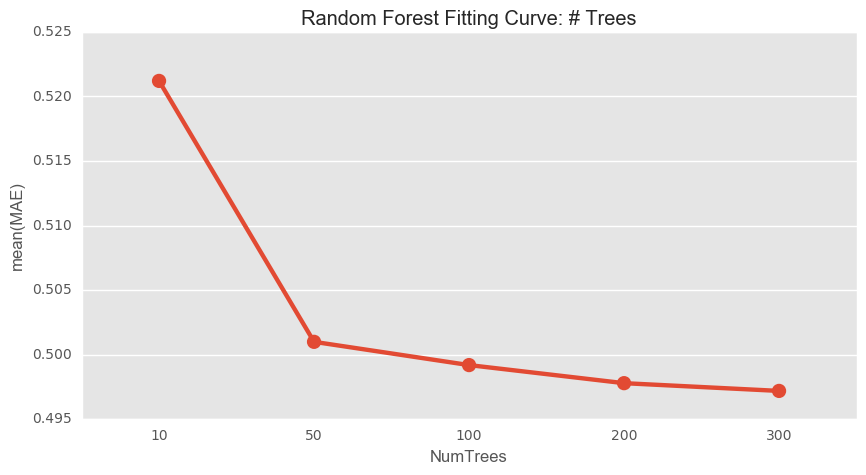

In [265]:
plt.figure(figsize = (10, 5))
sns.pointplot(x = 'NumTrees', y = 'MAE', data = randomForestAccuracy)
sns.plt.title('Random Forest Fitting Curve: # Trees')

In [10]:
rf200 = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 46)

# Fitting the model with better performance 
rf200.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=46,
           verbose=0, warm_start=False)

In [11]:
# Creating a new data frame out of the 300 most important features for additional model training
X_important = X[rf200.feature_importances_.argsort()[::-1][:300]]

In [12]:
# Normalizing the values for Neural Nets & SVM
min_max_scaler = preprocessing.MinMaxScaler()

X_imp_norm = min_max_scaler.fit_transform(X_important)
y_norm = min_max_scaler.fit_transform(y)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## Neural Networks

In [171]:
from sklearn.neural_network import MLPRegressor

neuralNet = MLPRegressor(hidden_layer_sizes = (150, 2)
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46
                        , early_stopping = True)

In [174]:
# rf300 = RandomForestRegressor(n_estimators = 300, n_jobs = -1, random_state = 46)

NN_MAE = model_selection.cross_val_score(neuralNet, X_important, y, cv = 5, scoring = 'neg_mean_absolute_error')
# rf300_MSE = model_selection.cross_val_score(rf300, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("\nRandom Forest (300 trees) MAE: %0.4f (+/- %0.2f)" % (-NN_MAE.mean(), NN_MAE.std() * 2))
# print("\nRandom Forest (300 trees) RMSE: %0.4f (+/- %0.2f)" % (-rf300_MSE.mean(), rf300_MSE.std() * 2))


Random Forest (300 trees) MAE: 1.0247 (+/- 0.95)


In [251]:
numNodes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,
            600, 650, 700, 750, 800, 850, 900, 950, 1000]

for node in numNodes:
    NN = MLPRegressor(hidden_layer_sizes = node
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46
                        , early_stopping = True)
    MAE = model_selection.cross_val_score(NN, X_imp_norm, y,
                                          cv = 5, scoring = 'neg_mean_absolute_error')
    
    print("Neural Network (Nodes = %0.2f) MAE: %0.4f (+/- %0.2f)" % (node, -MAE.mean(),
                                                                         MAE.std() * 2))

Neural Network (Nodes = 50.00) MAE: 0.6407 (+/- 0.04)
Neural Network (Nodes = 100.00) MAE: 0.6400 (+/- 0.02)
Neural Network (Nodes = 150.00) MAE: 0.6403 (+/- 0.04)
Neural Network (Nodes = 200.00) MAE: 0.6448 (+/- 0.04)
Neural Network (Nodes = 250.00) MAE: 0.6405 (+/- 0.04)
Neural Network (Nodes = 300.00) MAE: 0.6379 (+/- 0.04)
Neural Network (Nodes = 350.00) MAE: 0.6442 (+/- 0.03)
Neural Network (Nodes = 400.00) MAE: 0.6395 (+/- 0.04)
Neural Network (Nodes = 450.00) MAE: 0.6443 (+/- 0.04)
Neural Network (Nodes = 500.00) MAE: 0.6398 (+/- 0.04)
Neural Network (Nodes = 550.00) MAE: 0.6380 (+/- 0.02)
Neural Network (Nodes = 600.00) MAE: 0.6406 (+/- 0.03)
Neural Network (Nodes = 650.00) MAE: 0.6364 (+/- 0.03)
Neural Network (Nodes = 700.00) MAE: 0.6377 (+/- 0.03)
Neural Network (Nodes = 750.00) MAE: 0.6407 (+/- 0.05)
Neural Network (Nodes = 800.00) MAE: 0.6398 (+/- 0.04)
Neural Network (Nodes = 850.00) MAE: 0.6424 (+/- 0.04)
Neural Network (Nodes = 900.00) MAE: 0.6385 (+/- 0.03)
Neural Netw

In [253]:
numNodes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,
            600, 650, 700, 750, 800, 850, 900, 950, 1000]

for node in numNodes:
    NN = MLPRegressor(hidden_layer_sizes = (node, 2)
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46
                        , early_stopping = True)
    MAE = model_selection.cross_val_score(NN, X_imp_norm, y,
                                          cv = 5, scoring = 'neg_mean_absolute_error')
    
    print("Neural Network (2 Hidden Layers, Nodes = %0.2f) MAE: %0.4f (+/- %0.2f)" % (node, -MAE.mean(),
                                                                         MAE.std() * 2))

Neural Network (2 Hidden Layers, Nodes = 50.00) MAE: 0.6484 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 100.00) MAE: 0.6396 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 150.00) MAE: 0.6420 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 200.00) MAE: 0.6367 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 250.00) MAE: 0.6444 (+/- 0.05)
Neural Network (2 Hidden Layers, Nodes = 300.00) MAE: 0.6436 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 350.00) MAE: 0.6383 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 400.00) MAE: 0.6411 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 450.00) MAE: 0.6440 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 500.00) MAE: 0.6442 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 550.00) MAE: 0.6415 (+/- 0.03)


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: 

Neural Network (2 Hidden Layers, Nodes = 600.00) MAE: 5.1120 (+/- 0.17)
Neural Network (2 Hidden Layers, Nodes = 650.00) MAE: 0.6384 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 700.00) MAE: 0.6369 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 750.00) MAE: 0.6366 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 800.00) MAE: 0.6391 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 850.00) MAE: 0.6401 (+/- 0.05)
Neural Network (2 Hidden Layers, Nodes = 900.00) MAE: 0.6379 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 950.00) MAE: 0.6379 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 1000.00) MAE: 0.6373 (+/- 0.05)


In [275]:
numNodes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,
            600, 650, 700, 750, 800, 850, 900, 950, 1000]

for node in numNodes:
    NN = MLPRegressor(hidden_layer_sizes = (node, 3)
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46
                        , early_stopping = True)
    MAE = model_selection.cross_val_score(NN, X_imp_norm, y,
                                          cv = 5, scoring = 'neg_mean_absolute_error')
    
    print("Neural Network (2 Hidden Layers, Nodes = %0.2f) MAE: %0.4f (+/- %0.2f)" % (node, -MAE.mean(),
                                                                         MAE.std() * 2))

Neural Network (2 Hidden Layers, Nodes = 50.00) MAE: 0.6414 (+/- 0.04)


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: 

Neural Network (2 Hidden Layers, Nodes = 100.00) MAE: 5.7693 (+/- 0.17)
Neural Network (2 Hidden Layers, Nodes = 150.00) MAE: 0.6406 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 200.00) MAE: 0.6414 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 250.00) MAE: 0.6410 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 300.00) MAE: 0.6409 (+/- 0.05)
Neural Network (2 Hidden Layers, Nodes = 350.00) MAE: 0.6442 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 400.00) MAE: 0.6372 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 450.00) MAE: 0.6453 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 500.00) MAE: 0.6428 (+/- 0.05)
Neural Network (2 Hidden Layers, Nodes = 550.00) MAE: 0.6400 (+/- 0.03)
Neural Network (2 Hidden Layers, Nodes = 600.00) MAE: 0.6455 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 650.00) MAE: 0.6424 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 700.00) MAE: 0.6368 (+/- 0.04)
Neural Network (2 Hidden Layers, Nodes = 750.00) MAE: 0.6424 (+/

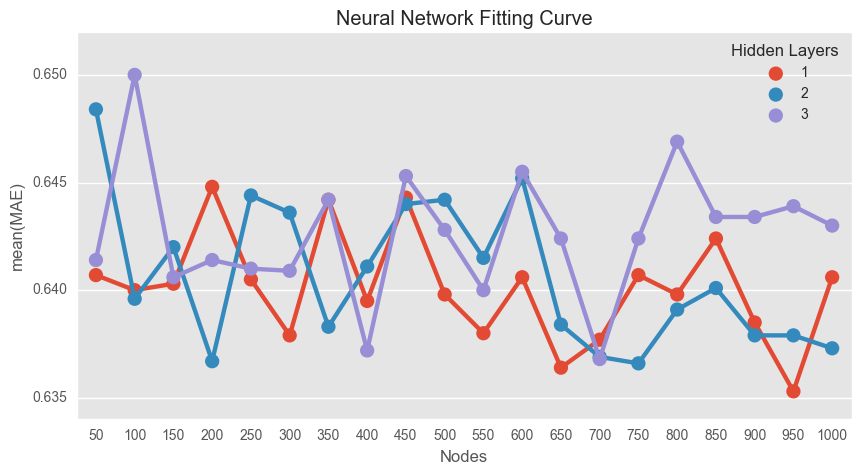

In [4]:
NN_MAE = pd.DataFrame([[50, 1, 0.6407],
[100, 1, 0.64],
[150, 1, 0.6403],
[200, 1, 0.6448],
[250, 1, 0.6405],
[300, 1, 0.6379],
[350, 1, 0.6442],
[400, 1, 0.6395],
[450, 1, 0.6443],
[500, 1, 0.6398],
[550, 1, 0.638],
[600, 1, 0.6406],
[650, 1, 0.6364],
[700, 1, 0.6377],
[750, 1, 0.6407],
[800, 1, 0.6398],
[850, 1, 0.6424],
[900, 1, 0.6385],
[950, 1, 0.6353],
[1000, 1, 0.6406],

[50, 2, 0.6484],
[100, 2, 0.6396],
[150, 2, 0.642],
[200, 2, 0.6367],
[250, 2, 0.6444],
[300, 2, 0.6436],
[350, 2, 0.6383],
[400, 2, 0.6411],
[450, 2, 0.644],
[500, 2, 0.6442],
[550, 2, 0.6415],
[600, 2, 0.6452],
[650, 2, 0.6384],
[700, 2, 0.6369],
[750, 2, 0.6366],
[800, 2, 0.6391],
[850, 2, 0.6401],
[900, 2, 0.6379],
[950, 2, 0.6379],
[1000, 2, 0.6373],
                      
[50, 3, 0.6414],
[100, 3, 0.65],
[150, 3, 0.6406],
[200, 3, 0.6414],
[250, 3, 0.641],
[300, 3, 0.6409],
[350, 3, 0.6442],
[400, 3, 0.6372],
[450, 3, 0.6453],
[500, 3, 0.6428],
[550, 3, 0.64],
[600, 3, 0.6455],
[650, 3, 0.6424],
[700, 3, 0.6368],
[750, 3, 0.6424],
[800, 3, 0.6469],
[850, 3, 0.6434],
[900, 3, 0.6434],
[950, 3, 0.6439],
[1000, 3, 0.643]]
, columns = ['Nodes', 'Hidden Layers', 'MAE'])


plt.figure(figsize=(10,5))
sns.pointplot(x = 'Nodes', y = 'MAE', hue = 'Hidden Layers', data = NN_MAE)
sns.plt.title('Neural Network Fitting Curve')

## Support Vector Machines

In [142]:
from sklearn.svm import SVR

supportVector = SVR(C = 1.0, epsilon = 0.1, verbose = True)

# supportVector.fit(X_important, y)
SVM_MAE = model_selection.cross_val_score(supportVector, X_important, y,
                                          cv = 5,
                                          scoring = 'neg_mean_absolute_error',
                                          n_jobs = 3)

print("Support Vector Machine MAE: %0.4f (+/- %0.2f)" % (-SVM_MAE.mean(), SVM_MAE.std() * 2))

Support Vector Machine MAE: -0.4228 (+/- 0.12)


In [250]:
C_vals = [0.00001, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

for c in C_vals:
    SVM = SVR(C = c, epsilon = 0.1)
    MAE = model_selection.cross_val_score(SVM, X_imp_norm, y,
                                          cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = 3)
    print("Support Vector Machine (C = %0.2f) MAE: %0.4f (+/- %0.2f)" % (c, -MAE.mean(),
                                                                         MAE.std() * 2))


Support Vector Machine (C = 0.00) MAE: 0.7397 (+/- 0.04)
Support Vector Machine (C = 1000.00) MAE: 0.6109 (+/- 0.04)
Support Vector Machine (C = 2000.00) MAE: 0.6062 (+/- 0.04)
Support Vector Machine (C = 3000.00) MAE: 0.6044 (+/- 0.04)
Support Vector Machine (C = 4000.00) MAE: 0.6045 (+/- 0.04)
Support Vector Machine (C = 5000.00) MAE: 0.6052 (+/- 0.04)
Support Vector Machine (C = 6000.00) MAE: 0.6057 (+/- 0.04)
Support Vector Machine (C = 7000.00) MAE: 0.6067 (+/- 0.04)
Support Vector Machine (C = 8000.00) MAE: 0.6078 (+/- 0.04)
Support Vector Machine (C = 9000.00) MAE: 0.6089 (+/- 0.04)
Support Vector Machine (C = 10000.00) MAE: 0.6101 (+/- 0.04)


In [252]:
eps_vals  = [0.01, 0.03, 0.05, 0.07, .1, .13, .15, .17, .2, .3, .4, .5]

for eps in eps_vals:
    SVM = SVR(C = 3000, epsilon = eps)
    MAE = model_selection.cross_val_score(SVM, X_imp_norm, y,
                                          cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = 3)
    print("Support Vector Machine (Epsilon = %0.2f) MAE: %0.4f (+/- %0.2f)" % (eps, -MAE.mean(),
                                                                         MAE.std() * 2))

Support Vector Machine (Epsilon = 0.01) MAE: 0.6076 (+/- 0.04)
Support Vector Machine (Epsilon = 0.03) MAE: 0.6069 (+/- 0.04)
Support Vector Machine (Epsilon = 0.05) MAE: 0.6062 (+/- 0.04)
Support Vector Machine (Epsilon = 0.07) MAE: 0.6055 (+/- 0.04)
Support Vector Machine (Epsilon = 0.10) MAE: 0.6044 (+/- 0.04)
Support Vector Machine (Epsilon = 0.13) MAE: 0.6033 (+/- 0.04)
Support Vector Machine (Epsilon = 0.15) MAE: 0.6027 (+/- 0.04)
Support Vector Machine (Epsilon = 0.17) MAE: 0.6022 (+/- 0.04)
Support Vector Machine (Epsilon = 0.20) MAE: 0.6018 (+/- 0.04)
Support Vector Machine (Epsilon = 0.30) MAE: 0.6006 (+/- 0.04)
Support Vector Machine (Epsilon = 0.40) MAE: 0.6007 (+/- 0.04)
Support Vector Machine (Epsilon = 0.50) MAE: 0.6022 (+/- 0.04)


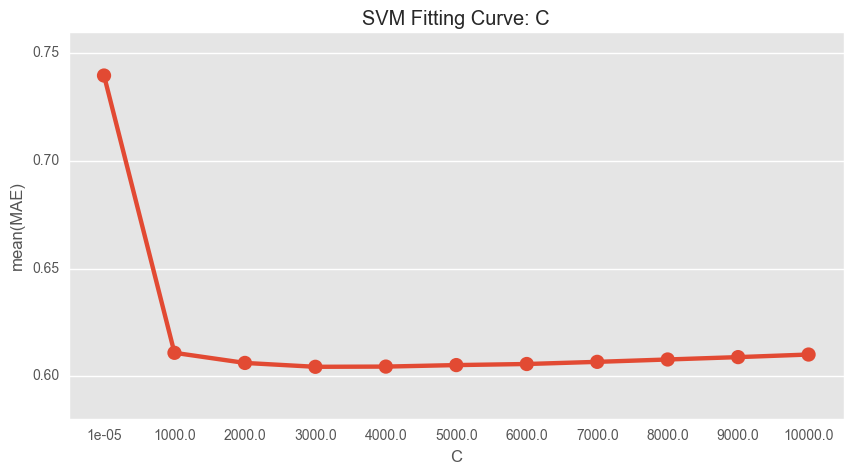

In [6]:
SVM_C = pd.DataFrame(
[[0.00001, 0.7397],
[1000, 0.6109],
[2000, 0.6062],
[3000, 0.6044],
[4000, 0.6045],
[5000, 0.6052],
[6000, 0.6057],
[7000, 0.6067],
[8000, 0.6078],
[9000, 0.6089],
[10000, 0.6101]]
, columns = ['C', 'MAE'])

plt.figure(figsize=(10,5))
sns.pointplot(x = 'C', y = 'MAE', data = SVM_C)
sns.plt.title('SVM Fitting Curve: C')

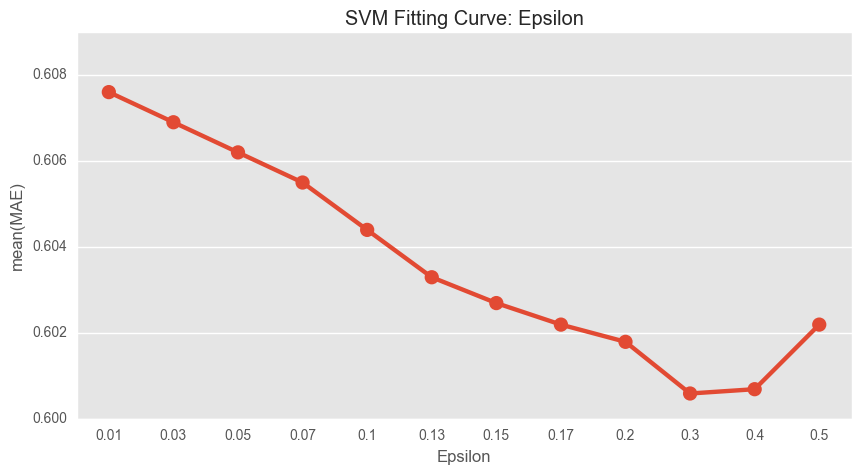

In [10]:
SVM_epsilon = pd.DataFrame(
[[0.01, 0.6076],
[0.03, 0.6069],
[0.05, 0.6062],
[0.07, 0.6055],
[0.1, 0.6044],
[0.13, 0.6033],
[0.15, 0.6027],
[0.17, 0.6022],
[0.2, 0.6018],
[0.3, 0.6006],
[0.4, 0.6007],
[0.5, 0.6022]]
, columns = ['Epsilon', 'MAE'])

plt.figure(figsize=(10,5))
sns.pointplot(x = 'Epsilon', y = 'MAE', data = SVM_epsilon, title = 'Test')
sns.plt.title('SVM Fitting Curve: Epsilon')

## Lasso Regression

In [20]:
train_data, test_data, train_target, test_target = model_selection.train_test_split(X, y, train_size=0.80, random_state=100)

from sklearn.linear_model import Lasso
lasso_reg = np.arange(1, 100)

for penalty in lasso_reg:
    model = Lasso(alpha = penalty/5000)
    model.fit(train_data, train_target)
    predicted = model.predict(test_data)
    actual = np.array(test_target)
    print(penalty/5000, 'MAPE: ', np.mean(abs((predicted - actual)/actual*100))
          , 'MAE: ', metrics.mean_absolute_error(actual, predicted)
         , 'RMSE: ', metrics.mean_squared_error(actual, predicted))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0002 MAPE:  7.50726874157 MAE:  0.580453032174 RMSE:  0.668237607982
0.0004 MAPE:  7.40955839047 MAE:  0.572228090264 RMSE:  0.653679380028
0.0006 MAPE:  7.39100186041 MAE:  0.570905455323 RMSE:  0.651974746591
0.0008 MAPE:  7.38335985636 MAE:  0.570443054336 RMSE:  0.651369619891
0.001 MAPE:  7.38104398774 MAE:  0.570308516025 RMSE:  0.651675383024
0.0012 MAPE:  7.38519856741 MAE:  0.570586437861 RMSE:  0.652759548503
0.0014 MAPE:  7.39010634658 MAE:  0.570915696963 RMSE:  0.65400017356
0.0016 MAPE:  7.39521291945 MAE:  0.571260967847 RMSE:  0.655386000068
0.0018 MAPE:  7.40185202727 MAE:  0.571718226003 RMSE:  0.656917025131
0.002 MAPE:  7.41051679817 MAE:  0.572323439812 RMSE:  0.658593244966
0.0022 MAPE:  7.420582264 MAE:  0.573035841377 RMSE:  0.660414666759
0.0024 MAPE:  7.43178468306 MAE:  0.573836417374 RMSE:  0.662381286946
0.0026 MAPE:  7.44391579787 MAE:  0.574708414963 RMSE:  0.664493100891
0.0028 MAPE:  7.45621951024 MAE:  0.575594023098 RMSE:  0.666750117408
0.003 MAPE:

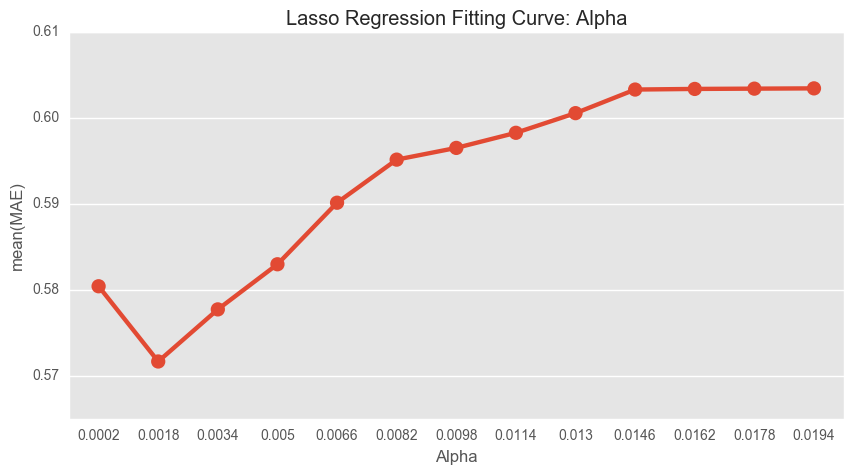

In [25]:
lassoAcc = pd.DataFrame([[0.0002, 7.50726874157, 0.580453032174, 0.668237607982],

[0.0018, 7.40185202727, 0.571718226003, 0.656917025131],
[0.0034, 7.48609147901, 0.577768022598, 0.672696329173],
[0.005, 7.55594076591, 0.583008592009, 0.687379667022],
[0.0066, 7.65008487239, 0.590154441104, 0.706215167873],
[0.0082, 7.71679360964, 0.595159438931, 0.719042955977],
[0.0098, 7.73701750822, 0.596520604911, 0.722087211785],
[0.0114, 7.76215437929, 0.598273980761, 0.725795017169],
[0.013, 7.79405171962, 0.600557145489, 0.730166275267],
[0.0146, 7.83175867901, 0.603297877108, 0.735200513908],
[0.0162, 7.83275989541, 0.603369426303, 0.735199220381],
[0.0178, 7.83322523692, 0.603401907047, 0.735122146243],
[0.0194, 7.83369064435, 0.603434391878, 0.735045225292]
]
, columns = ['Alpha', 'MAPE', 'MAE', 'RMSE'])

plt.figure(figsize=(10,5))
sns.pointplot(x ='Alpha', y = 'MAE', data = lassoAcc)
sns.plt.title('Lasso Regression Fitting Curve: Alpha')

## Final Models

#### Extracting the final MAPE

In [51]:
SMV = SVR(C = 3000, epsilon = 0.3)

# SMV_MAE = model_selection.cross_val_score(SMV, X_important, y, cv = 5, scoring = 'neg_mean_absolute_error')
SMV_MSE = model_selection.cross_val_score(SMV, X, y, cv = 5, scoring = 'neg_mean_squared_error')
# print("\nSMV MAE: %0.4f (+/- %0.2f)" % (-SMV.mean(), SMV.std() * 2))
print("\nSMV RMSE: %0.4f (+/- %0.2f)" % (-SMV_MSE.mean(), SMV_MSE.std() * 2))


SMV RMSE: 0.5325 (+/- 0.19)


In [52]:
from sklearn.neural_network import MLPRegressor

neuralNet = MLPRegressor(hidden_layer_sizes = (950, 1)
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46
                        , early_stopping = True)

NN_MSE = model_selection.cross_val_score(neuralNet, X, y, cv = 5, scoring = 'neg_mean_squared_error')

print("\nNeural Net RMSE: %0.4f (+/- %0.2f)" % (-NN_MSE.mean(), NN_MSE.std() * 2))

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: 


Neural Net RMSE: 12.4251 (+/- 1.18)


In [14]:
## Train the model (fit the data)
train_data, test_data, train_target, test_target = model_selection.train_test_split(X, y, train_size=0.80, random_state=100)

randomForest = RandomForestRegressor(random_state = 46, n_jobs = -1, n_estimators = 300)

# Train the model Training Dataset
randomForest.fit(train_data,train_target)

# Test the model on Testing Dataset
predicted = randomForest.predict(test_data)
actual = np.array(test_target)
                  
print(np.mean(abs((predicted - actual)/actual*100)))

6.3784599096


In [18]:
## Train the model (fit the data)
train_data, test_data, train_target, test_target = model_selection.train_test_split(X_imp_norm, y, train_size=0.80, random_state=100)

from sklearn.neural_network import MLPRegressor

neuralNet = MLPRegressor(hidden_layer_sizes = (950, 1)
                        , solver = 'adam'
                        , alpha = 0.01
                        , learning_rate = 'adaptive'
                        , random_state = 46)

# Train the model Training Dataset
neuralNet.fit(train_data,train_target)

# Test the model on Testing Dataset
predicted = neuralNet.predict(test_data)
actual = np.array(test_target)
                  
print(np.mean(abs((predicted - actual)/actual*100)))

56.1229781814


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [17]:
## Train the model (fit the data)
train_data, test_data, train_target, test_target = model_selection.train_test_split(X_imp_norm, y, train_size=0.80, random_state=100)

from sklearn.svm import SVR

SVM = SVR(C = 3000, epsilon = 0.3)

# Train the model Training Dataset
SVM.fit(train_data,train_target)

# Test the model on Testing Dataset
predicted = SVM.predict(test_data)
actual = np.array(test_target)
                  
print(np.mean(abs((predicted - actual)/actual*100)))

7.87123241835


In [10]:
## Train the model (fit the data)
train_data, test_data, train_target, test_target = model_selection.train_test_split(X, y, train_size=0.80, random_state=100)

from sklearn.linear_model import Lasso

LR = Lasso(alpha = 50)

# Train the model Training Dataset
LR.fit(train_data,train_target)

# Test the model on Testing Dataset
predicted = LR.predict(test_data)
actual = np.array(test_target)
                  
print(np.mean(abs((predicted - actual)/actual*100)))

9.23026540339
